Name: Madhuresh Gupta

NU ID: 002198926

Question 2: We need to derive two estimators for w using maximum-likelihood (ML) and maximum-a-posteriori (MAP) parameter estimation approaches as a function of data samples given using professor's code

Below cell represents the code given by professor Deniz to generate sample data:

In [1]:
import numpy as np
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

def hw2q2():
    Ntrain = 100
    data = generateData(Ntrain)
    plot3(data[0,:],data[1,:],data[2,:])
    xTrain = data[0:2,:]
    yTrain = data[2,:]
    
    Ntrain = 1000
    data = generateData(Ntrain)
    plot3(data[0,:],data[1,:],data[2,:])
    xValidate = data[0:2,:]
    yValidate = data[2,:]
    
    return xTrain,yTrain,xValidate,yValidate

def generateData(N):
    gmmParameters = {}
    gmmParameters['priors'] = [.3,.4,.3] # priors should be a row vector
    gmmParameters['meanVectors'] = np.array([[-10, 0, 10], [0, 0, 0], [10, 0, -
10]])
    gmmParameters['covMatrices'] = np.zeros((3, 3, 3))
    gmmParameters['covMatrices'][:,:,0] = np.array([[1, 0, -3], [0, 1, 0], [-3, 0, 
15]])
    gmmParameters['covMatrices'][:,:,1] = np.array([[8, 0, 0], [0, .5, 0], [0, 
0, .5]])
    gmmParameters['covMatrices'][:,:,2] = np.array([[1, 0, -3], [0, 1, 0], [-3, 0, 
15]])
    x,labels = generateDataFromGMM(N,gmmParameters)
    return x

def generateDataFromGMM(N,gmmParameters):
#    Generates N vector samples from the specified mixture of Gaussians
#    Returns samples and their component labels
#    Data dimensionality is determined by the size of mu/Sigma parameters
    priors = gmmParameters['priors'] # priors should be a row vector
    meanVectors = gmmParameters['meanVectors']
    covMatrices = gmmParameters['covMatrices']
    n = meanVectors.shape[0] # Data dimensionality
    C = len(priors) # Number of components
    x = np.zeros((n,N))
    labels = np.zeros((1,N))
    # Decide randomly which samples will come from each component
    u = np.random.random((1,N))
    thresholds = np.zeros((1,C+1))
    thresholds[:,0:C] = np.cumsum(priors)
    thresholds[:,C] = 1
    for l in range(C):
        indl = np.where(u <= float(thresholds[:,l]))
        Nl = len(indl[1])
        labels[indl] = (l+1)*1
        u[indl] = 1.1
        x[:,indl[1]] = np.transpose(np.random.multivariate_normal(meanVectors[:,l],
covMatrices[:,:,l], Nl))
        
    return x,labels

def plot3(a,b,c,mark="o",col="b"):
  from matplotlib import pyplot
  import pylab
  from mpl_toolkits.mplot3d import Axes3D
  pylab.ion()
  fig = pylab.figure()
  ax = Axes3D(fig)
  ax.scatter(a, b, c,marker=mark,color=col)
  ax.set_xlabel("x1")
  ax.set_ylabel("x2")
  ax.set_zlabel("y")
  ax.set_title('Training Dataset')

Code for MAP:

In [2]:
def map(phi, gamma, t):
    tphi = np.transpose(phi)
    results = np.matmul(np.linalg.inv(np.add(gamma*np.identity(phi.shape[1]), np.matmul(tphi,phi))),tphi)
    # multiply by y
    results = np.matmul(results, t)
    return results

Code for Maximum Likelihood Estimator:

In [3]:
def maximumLikelihood(phi, t):
    # get pseudo-inverse
    tphi = np.transpose(phi)
    results = np.matmul(np.linalg.inv(np.matmul(tphi,phi)),tphi)
    # multiply by y
    results = np.matmul(results, t)
    return results

# we calculate the mean squared values of gammas from 10^-4 to 10^4
def mean_squared_error(w, x_test, y_test):
    N = len(y_test)
    x = []
    for i in range(0,N,1):
        row = [1, x_test[0][i], x_test[1][i], x_test[0][i]**2, 
                x_test[1][i]**2, x_test[0][i]**3, x_test[1][i]**3]
        x.append(row)
    total_error = 0
    for n in range(0,N,1):
        error = (y_test[n]-np.dot((w),x[n]))**2
        total_error = total_error + error
    total_error = total_error/N
    return total_error[0,0]

Training the dataset:

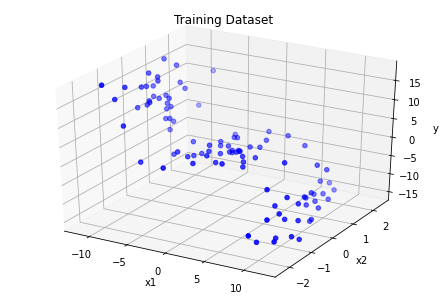

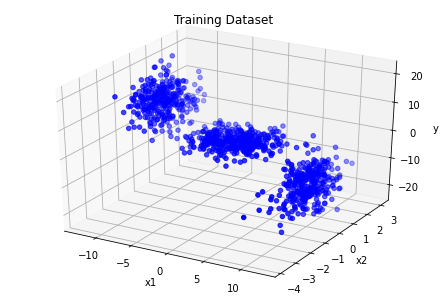

In [4]:
x_train, y_train, x_test, y_test = hw2q2()
N = 100
phi = []

for i in range(0,100,1):
    row = [1, x_train[0][i], x_train[1][i], x_train[0][i]**2, 
            x_train[1][i]**2, x_train[0][i]**3, x_train[1][i]**3]
    phi.append(row)
phi = np.matrix(phi)


Code for Maximum likelihood estimation

In [5]:
def maximumLikelihood(phi, t):
    # get pseudo-inverse
    tphi = np.transpose(phi)
    results = np.matmul(np.linalg.inv(np.matmul(tphi,phi)),tphi)
    # multiply by y
    results = np.matmul(results, t)
    return results

Plotting training using Maximum-a-posteriori (MAP):

0.0001
The MAP error is:  4.995890271222145
0.001
The MAP error is:  4.995873634345387
0.01
The MAP error is:  4.9957073534626
0.1
The MAP error is:  4.994053287272052
1.0
The MAP error is:  4.978343316466669
10.0
The MAP error is:  4.875616661472554
100.0
The MAP error is:  4.696895969321615
1000.0
The MAP error is:  4.576899390187344
10000.0
The MAP error is:  4.55361446820546


Text(0.5, 0, 'Validate, (x2,y)')

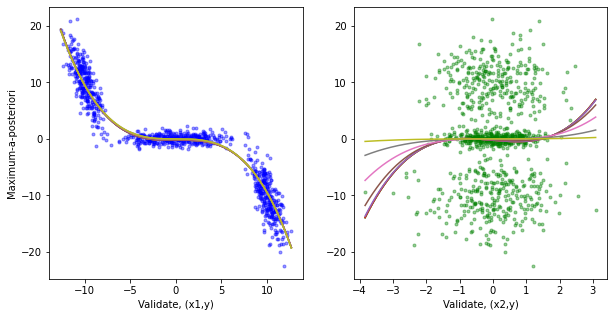

In [6]:
# Plot training data
fig, axes = plt.subplots(1,2, figsize=(10,5))


for i in range(0,1000,1):
    axes[0].plot(x_test[0][i], y_test[i], color='blue', marker = '.', alpha=0.4)
    axes[1].plot(x_test[1][i], y_test[i], color='green', marker='.', alpha=0.4)

min_x_0 = min(x_test[0])
max_x_0 = max(x_test[0])
min_x_1 = min(x_test[1])
max_x_1 = max(x_test[1])

# Add lines to plots
x_0 = np.linspace(min_x_0, max_x_0, num=1000)
x_1 = np.linspace(min_x_1, max_x_1, num=1000)

# Maximum-a-posteriori
gammas = [i for i in np.logspace(-4,4,9)]
for gamma in gammas:
    print(gamma)
    map_w = map(phi, gamma, y_train)
    error = mean_squared_error(map_w, x_test, y_test)
    print("The MAP error is: ", error)
    w = np.transpose(map_w)[:,0]
    fx = []
    for i in range(len(x_0)):
        x = x_0[i]
        # w: 0,1,3,5
        fx.append(w[0]+w[1]*x+w[3]*x**2+w[5]*x**3)
    fx = np.squeeze(fx)
    axes[0].plot(x_0,fx)
    fx = []
    for i in range(len(x_1)):
        x = x_1[i]
        # w: 0,1,3,5
        fx.append(w[0]+w[2]*x+w[4]*x**2+w[6]*x**3)
    fx = np.squeeze(fx)
    axes[1].plot(x_1,fx)
axes[0].set_ylabel('Maximum-a-posteriori')
axes[0].set_xlabel('Validate, (x1,y)')
axes[1].set_xlabel('Validate, (x2,y)')


Testing code:


testin testing

The MLE error is:  4.995892119862683


Text(0.5, 0, 'Validate, (x_2,y)')

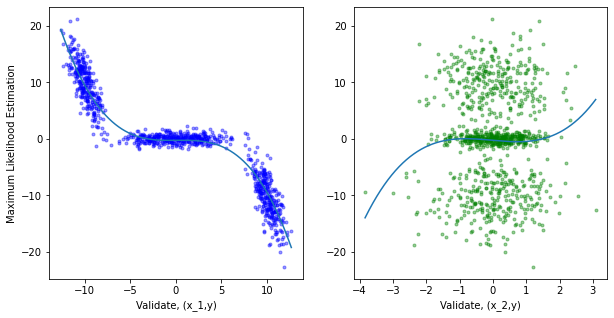

In [7]:
# Plot training data
fig, axes = plt.subplots(1,2, figsize=(10,5))


for i in range(0,1000,1):
    axes[0].plot(x_test[0][i], y_test[i], color='blue', marker = '.', alpha=0.4)
    axes[1].plot(x_test[1][i], y_test[i], color='green', marker='.', alpha=0.4)

min_x_0 = min(x_test[0])
max_x_0 = max(x_test[0])
min_x_1 = min(x_test[1])
max_x_1 = max(x_test[1])

# Add lines to plots
x_0 = np.linspace(min_x_0, max_x_0, num=1000)
x_1 = np.linspace(min_x_1, max_x_1, num=1000)


# Maximum Likelihood Estimation
mle_w = maximumLikelihood(phi, y_train)
error = mean_squared_error(mle_w, x_test, y_test)
print("The MLE error is: ", error)
# Add lines to plots
x_0 = np.linspace(min_x_0, max_x_0, num=1000)
x_1 = np.linspace(min_x_1, max_x_1, num=1000)
w = np.transpose(mle_w)[:,0]
fx = []
for i in range(len(x_0)):
    x = x_0[i]
    # w: 0,1,3,5
    fx.append(w[0]+w[1]*x+w[3]*x**2+w[5]*x**3)
fx = np.squeeze(fx)
axes[0].plot(x_0,fx)
fx = []
for i in range(len(x_1)):
    x = x_1[i]
    # w: 0,1,3,5
    fx.append(w[0]+w[2]*x+w[4]*x**2+w[6]*x**3)
fx = np.squeeze(fx)
axes[1].plot(x_1,fx)

axes[0].set_ylabel('Maximum Likelihood Estimation')

axes[0].set_xlabel('Validate, (x_1,y)')
axes[1].set_xlabel('Validate, (x_2,y)')